In [1]:
!pip install vaderSentiment
import tweepy
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
orig_working_directory = os.getcwd()
print(orig_working_directory)

C:\Users\cfing\Cole-GWU-Homework\API Challenge\Twitter-API


In [3]:
os.chdir(os.path.join('..','..'))
curr_working_directory = os.getcwd()
os.getcwd()

'C:\\Users\\cfing\\Cole-GWU-Homework'

In [4]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)

print(api)

In [6]:
user_account= ['BBC', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']



In [7]:
tweet_list= []
name= []
tweet_id = []
created_at= []
favorite_count= []
full_text= []
entities= []
# x is grabbing the news outlet, tweet is grabbing tweets in public tweets**
for x in user_account:
    public_tweets= tweepy.Cursor(api.user_timeline,x,tweet_mode= 'extended').items(100)
    for tweet in public_tweets:
        tweet_list.append(tweet)
        

In [8]:
for tweet in tweet_list:
    tweet_id.append(tweet.id)
    created_at.append(tweet.created_at)
    favorite_count.append(tweet.favorite_count)
    full_text.append(tweet.full_text)
    entities.append(tweet.entities)
    name.append(tweet.author.name)

In [9]:
tweets_df= pd.DataFrame({"Tweet ID": tweet_id,
                        "Tweet Time": created_at,
                        "Favorite Count": favorite_count,
                        "Tweet Text": full_text,
                        "Name": name})

In [10]:
base_name= tweets_df.loc[0,'Name']
counter= 0
tweets_df["Tweets Ago"]= ''

for index, tweet_row in tweets_df.iterrows():
        if tweet_row["Name"] == base_name:
            tweets_df.loc[index,"Tweets Ago"] = counter 
            counter += 1
          
        if tweet_row["Name"] != base_name:
            counter= 0 
            tweets_df.loc[index,"Tweets Ago"] = counter 
            base_name=tweet_row["Name"]
            counter+=1
            

In [11]:
for index, row in tweets_df.iterrows():
    tweet=row['Tweet Text']
    results= analyzer.polarity_scores(f'{tweet}')
    tweets_df.loc[index,'compound'] = results['compound']
    tweets_df.loc[index, 'positive'] = results['pos']
    tweets_df.loc[index,'neutral'] = results['neu']
    tweets_df.loc[index,'negative'] = results['neg']
                                      
                                  

In [12]:
tweets_df.to_csv('sentiment_dataframe.csv')

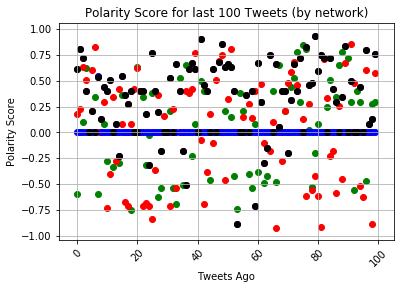

In [13]:


x= tweets_df.iloc[0:100,5]

bbc_points= tweets_df["Name"]=='BBC'
cbs_points=tweets_df["Name"]=='CBS News'
cnn_points=tweets_df["Name"]=='CNN'
fox_points=tweets_df["Name"]=='Fox News'
nyt_points=tweets_df["Name"]=='The New York Times'



bbc= tweets_df.loc[bbc_points]
cbs= tweets_df.loc[cbs_points]
cnn= tweets_df.loc[cnn_points]
fox= tweets_df.loc[fox_points]
nyt= tweets_df.loc[nyt_points]

bbc= bbc['compound']
cbs = cbs['compound']
cnn= cnn['compound']
fox= fox['compound']
nyt= nyt['compound']


plt.scatter(x,bbc,color = 'purple')
plt.scatter(x,cbs,color = 'green')
plt.scatter(x,cnn,color = 'red')
plt.scatter(x,fox,color = 'blue')
plt.scatter(x,bbc,color = 'black')

plt.xticks(rotation=45)
plt.xlabel("Tweets Ago")
plt.ylabel("Polarity Score")
plt.title("Polarity Score for last 100 Tweets (by network)")
plt.grid(True)
 
plt.savefig('Tweets')

In [14]:
tweet_polarity= tweets_df.groupby(["Name"]).mean()["compound"]
pd.DataFrame(tweet_polarity)
tweet_polarity

Name
BBC                   0.310002
CBS News              0.039351
CNN                   0.027862
Fox News              0.005423
The New York Times   -0.050024
Name: compound, dtype: float64

In [15]:
polarity_mean= (tweet_polarity['BBC'], tweet_polarity['CBS News'],tweet_polarity['CNN'], 
                tweet_polarity['Fox News'], tweet_polarity['The New York Times'])

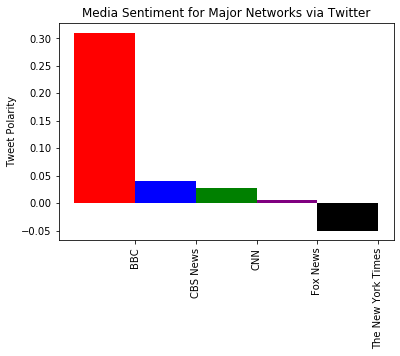

In [16]:
fig, ax = plt.subplots()
ind= np.arange(len(tweet_polarity))
width = 1
rect1= ax.bar(ind[0], tweet_polarity[0], width, color = "red")
rect2= ax.bar(ind[1], tweet_polarity[1], width, color = "blue")
rect3= ax.bar(ind[2], tweet_polarity[2], width, color = "green")
rect4= ax.bar(ind[3], tweet_polarity[3], width, color = "purple")
rect5= ax.bar(ind[4], tweet_polarity[4], width, color = "black")

plt.xticks(rotation=90)
ax.set_ylabel("Tweet Polarity")
ax.set_title("Media Sentiment for Major Networks via Twitter")
ax.set_xticks(ind +0.5)
ax.set_xticklabels(('BBC','CBS News','CNN','Fox News','The New York Times' ))
plt.savefig('Polarity')
